# Ex04 - Filtragem de Imagens

 convolução discreta é uma ferramenta utilizada para construir qualquer filtro linear ou de deslocamento. 

**Filtros suavizantes:** são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

**Filtros aguçantes:** são aqueles que realçam as bordas da imagem. Um dos filtros aguçantes mais comum é o Sobel (https://en.wikipedia.org/wiki/Sobel_operator).

Veja mais no notebook sobre [Filtragem no domínio espacial](07 Filtragem no domínio espacial.ipynb)

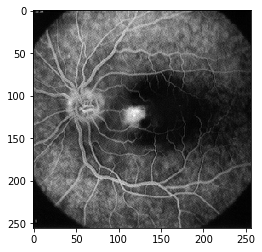

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
f = mpimg.imread('../data/retina.tif')  
plt.imshow(f,cmap='gray')

### Exercício 1

Entenda o uso da função numpy.convolve e experimente usá-la para entender o filtro da média. Sugestões:
- comece com uma imagem numérica pequena e depois use a imagem da retina
- faça experimentos variando o tamanho da máscara do filtro e compare as imagens resultantes
- varie também o modos da função, explicando as diferenças encontradas
- compare os resultados obtidos pela função numpy.convolve com a filtragem usando a função conv da toolbox ia898

In [2]:
import sys,os
ia898path = os.path.abspath('../src')
if ia898path not in sys.path:
        sys.path.append(ia898path)
import conv as ia898

### Explorando a função numpy.convolve

A função numpy.convolve aplica a convolução em array unidimensionais, portanto, temos de nos certificar de que o shape dos arrays satisfazem o requisito.

In [3]:
# cria array de tamanho 10
array  = np.asarray([ 5,  2,  0, 14, 10,  6,  8,  4, 12, 13])
array

array([ 5,  2,  0, 14, 10,  6,  8,  4, 12, 13])

In [4]:
# cria filtro  de blur
fltr = np.zeros(shape=3) + np.asarray([3/10, 2/10, 1/2])
fltr

array([0.3, 0.2, 0.5])

Utilizando o modo 'full', a função numpy.convolve retorna a convolução de 'v' em 'a' e retorna a convolução de todos os pontos em que houve sobreposição, assim, o shape do array resultante é (length(a) + length(v) - 1). Repare que o array v é "rotacionado" de 180º antes de ser "deslizado" sobre o outro array.

In [5]:
new_mtrx = np.convolve(v=fltr, a=array, mode="full")
new_mtrx

array([ 1.5,  1.6,  2.9,  5.2,  5.8, 10.8,  8.6,  5.8,  8.4,  8.3,  8.6,
        6.5])

Utilizando o modo 'same', numpy.convolve retorna um array de tamanho igual ao maior tamanho dos arrays passados, que no caso abaixo é 10. Note que os efeitos de borda ainda são visíveis como no modo 'full', e que o padding utilizado é feito com zeros.

In [6]:
new_mtrx = np.convolve(v=fltr, a=array, mode="same")
new_mtrx

array([ 1.6,  2.9,  5.2,  5.8, 10.8,  8.6,  5.8,  8.4,  8.3,  8.6])

In [7]:
new_mtrx = np.convolve(v=fltr, a=array, mode="valid")
new_mtrx

array([ 2.9,  5.2,  5.8, 10.8,  8.6,  5.8,  8.4,  8.3])

### Explorando a função scipy.signal.convolve2d

A função scipy.signal.convolve2d utiliza os mesmo principios utilizado pela funcao numpy.convolve, exceto que ela pode ser aplica diretamente em arrays bidimensionais, e além disso, nos permite escolher entre 3 formas de tratar dos casos de borda utilizando as entradas 'boundary' e 'fillvalue' da função.

In [8]:
# importing library
import scipy.signal as sg

In [9]:
# cria matriz 
mtrx = np.random.randint(size=(3,3), low=0, high=10)
mtrx

array([[7, 5, 4],
       [4, 2, 2],
       [2, 6, 0]])

In [10]:
# cria filtro
fltr = np.asarray([[3,3,3], [1,10,1],[2,2,2]])*(1/27)
fltr

array([[0.11111111, 0.11111111, 0.11111111],
       [0.03703704, 0.37037037, 0.03703704],
       [0.07407407, 0.07407407, 0.07407407]])

As 3 formas de tratar o problema das bordas da imagem utilizando a função são: 'fill', 'wrap' e 'symm'.

A primeira acrescenta duas linhas e duas colunas à matriz de modo a envolvê-la com valor 'fillvalue' que pode ser opicionalmente passado a função (por default esse valor é zero).

A segunda implementa uma forma de matriz circular, onde a própria matriz é "colada" na frente e atrás da matriz original. Por exemplo, no caso das colunas, coluna[-1] = coluna[largura-1], coluna[-2] = coluna[largura-2].

A última possui a mesma essência da segunda, porém, o que é feito é um espelhamento da imagem nas bordas. Assim, no caso das colunas, coluna[-1] = coluna[1], coluna[-2] = coluna[2].

Nos dois últimos casos, o mesmo é feito para as linhas também.

In [11]:
boundary_modes = ['fill', 'wrap', 'symm']

# aplica convolucao lidando com as boradsas de 3 maneirs diferentes
new_mtrx = [sg.convolve2d(in1=mtrx, in2=fltr, mode='same', 
                         boundary=boundary_modes[i], fillvalue=0) for i in range(3)]
print("fill mode = \n",new_mtrx[0])
print("wrap mode = \n",new_mtrx[1])
print("symm mode = \n",new_mtrx[2])

fill mode = 
 [[3.44444444 3.14814815 2.11111111]
 [3.33333333 3.03703704 2.14814815]
 [1.40740741 2.88888889 0.51851852]]
wrap mode = 
 [[4.40740741 3.74074074 3.40740741]
 [3.7037037  3.03703704 3.03703704]
 [3.33333333 4.66666667 2.66666667]]
symm mode = 
 [[5.55555556 4.33333333 3.44444444]
 [4.22222222 3.03703704 2.51851852]
 [2.88888889 3.77777778 1.33333333]]


### Utilizando  a toolbox ia898

In [12]:
new_mtrx = ia898.conv(mtrx,fltr)
new_mtrx

array([[0.77777778, 1.33333333, 1.77777778, 1.        , 0.44444444],
       [0.7037037 , 3.44444444, 3.14814815, 2.11111111, 0.37037037],
       [0.88888889, 3.33333333, 3.03703704, 2.14814815, 0.37037037],
       [0.37037037, 1.40740741, 2.88888889, 0.51851852, 0.14814815],
       [0.14814815, 0.59259259, 0.59259259, 0.44444444, 0.        ]])

Podemos observar que a função ia898.conv trata do problema das bordas da mesma forma que o numpý.convolve trata, assim como quando o scipy.signal.convolve2d é utilizado com 'boundary' = 'fill'. Além disso, quando utilizamos o modo 'full' no numpy.convolve ele produz a mesma saída.

Agora podemos utilizar um filtro e aplicá-lo em uma imagem não sintética.

In [13]:
# importing library
from PIL import Image

In [14]:
# cola uma matriz ao lado de outras
def glue(m_list, amount):
    glued_mtrx = m_list[0]
    for i in range(1,amount):
        glued_mtrx = np.concatenate((glued_mtrx, m_list[i]), axis=1)
    return glued_mtrx

In [15]:
# produz ruido na matriz
def noise(m, num, value = 255):
    h,w = m.shape
    noised = m.copy()
    for i in range(num):
        x = np.random.randint(low=0, high=h-1)
        y = np.random.randint(low=0, high=h-1)
        noised[x,y] = value
    return noised

In [16]:
img = Image.open('../data/retina.tif')
mtrx = np.asarray(img, dtype='uint32')

# cria dois filtros blur de ordem 3 e 5 respectivamente
fltr = [np.zeros(shape=(i,i)) + 1/(i*i) for i in range(3,8,2)]

In [17]:
noised_mtrx = noise(mtrx,30)

In [18]:
new_mtrx = [sg.convolve2d(noised_mtrx,fltr[i], mode='same',boundary='fill', fillvalue=0) for i in range(3)]

# cola as matrizes uma ao lado da outra
new_mtrx = glue(new_mtrx, 3)

blurred_img = Image.fromarray(new_mtrx.astype('uint8'))

Imagem com ruído sem aplicação do filtro

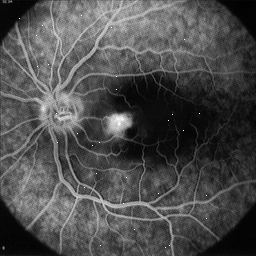

In [19]:
Image.fromarray(noised_mtrx.astype('uint8'))

Imagens após a aplicação dos filtros 3x3, 5x5 e 7x7 respectivamente.

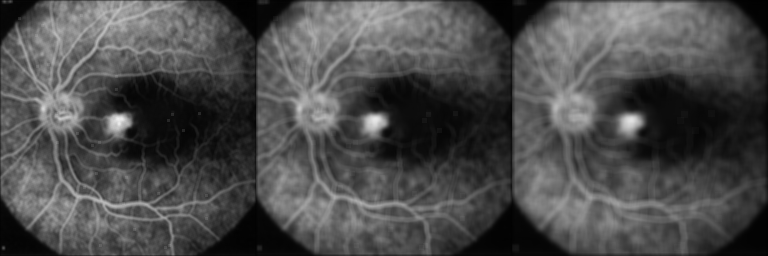

In [20]:
blurred_img

Como podemos observar, aumentar o filtro pode gerar efeitos indesejados na imagem. No caso, além de diminuir o ruído acabamos borrando toda a imagem, assim, perdendo bastante informação dela também.

### Exercício 2

Explore o filtro Gaussiano. Sugestões:
- teste a propriedade de decomposição das máscaras da convolução, ou seja, crie um filtro gaussiano bi-dimensional (3,3) a partir de 2 filtros unidimensionais (3,1) e (1,3)
- Faça experimentos de filtragem variando os parâmetros do filtro (tamanho da máscara do filtro, a média e o desvio padrão) 
- adicione ruído a uma imagem e depois tente remover o ruído com filtragem

### Solução

Aqui é criado uma série de funções que irão nos ajudar a gerar os filtros e aplicar a convolução nas imagens

In [21]:
def trianguloPascal(n):
    lista = [[1],[1,1]]
    for i in range(1,n):
        linha = [1]
        for j in range(0,len(lista[i])-1):
            linha += [ lista[i][j] + lista[i][j+1] ]
        linha += [1]
        lista += [linha]
    return lista[n]

In [22]:
# cria filtro de gauss
def gauss_filter(size = 3):
    import numpy as np
    
    if not size%2:
        size += 1
    
    pascal = np.asarray(trianguloPascal(size-1))
    s = pascal.sum()
    return [pascal/s, s]

In [23]:
def convolve1d(mtrx, fltr_x, fltr_y):
    import scipy.signal as sg
    x,y = mtrx.shape
    conv_mtrx_x = [sg.convolve(mtrx[i,:], fltr_x, mode='same', method="direct") for i in range(x)]
    conv_mtrx_x = np.asarray(conv_mtrx_x)
    conv_mtrx_y = [sg.convolve(conv_mtrx_x[:,i], fltr_y, mode='same', method="direct") for i in range(y)]
    return np.asarray(conv_mtrx_y, dtype='uint8').T

In [24]:
def convolve2d(mtrx, fltr):
    import scipy.signal as sg
    return sg.convolve2d(in1=mtrx, in2=fltr, mode='same',boundary="fill", fillvalue=0)

In [25]:
def combine_filters(f1,f2):
    import numpy as np
    f1 = f1[:, np.newaxis]
    f2 = f2[np.newaxis, :]
    return np.dot(f1,f2)

In [26]:
def yield_filters(order, printable=True):
    fltr_x, s = gauss_filter(order)
    fltr_y = fltr_x.copy()
    fltr = combine_filters(fltr_x, fltr_y)
    if printable:
        print("filtro gaussiano em x=\n", fltr_x*s, "*1/%d" %(s))
        print("filtro gaussiano em y=\n", fltr_y*s, "*1/%d" %(s))
        print("filtro gaussiano matricial=\n", fltr*s*s, "*1/%d" %(s*s))
    return [fltr_x, fltr_y, fltr]

Agora já é possível gerar alguns filtros e aplicá-los nas imagens

In [27]:
fltr_x, fltr_y, fltr = yield_filters(3)

filtro gaussiano em x=
 [1. 2. 1.] *1/4
filtro gaussiano em y=
 [1. 2. 1.] *1/4
filtro gaussiano matricial=
 [[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]] *1/16


Para testar a validade da decomposição do filtro gaussiano, podemos aplicá-los em uma imagem e verificar se o resultado gerado é o mesmo.

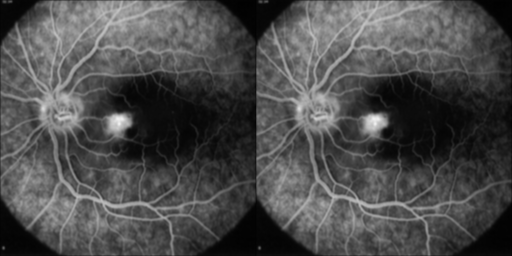

In [28]:
conv_mtrx_xy = convolve1d(mtrx, fltr_x, fltr_y) # convolve 1d utilizando a funcao numpy.convolve
conv_total = convolve2d(mtrx, fltr).astype("uint8") # convolve 2d utilizando a funcao scipy.signal.convolve2d
Image.fromarray(glue([conv_mtrx_xy, conv_total],2), mode="L")

Verificando elemento por elemento, temos a confirmação que o resultado da convolução é o mesmo.

In [29]:
if conv_mtrx_xy.all() == conv_total.all():
    print("True")
else:
    print("False")

True


Agora podemos verificar, de forma rasa é claro, a eficácia do filtro na tarefa de remover ruídos em uma imagem.

In [30]:
noised_mtrx = noise(m=mtrx, num=30, value = 255).astype("uint8") #adiciona 30 pontos brancos na imagem aleatoriamente

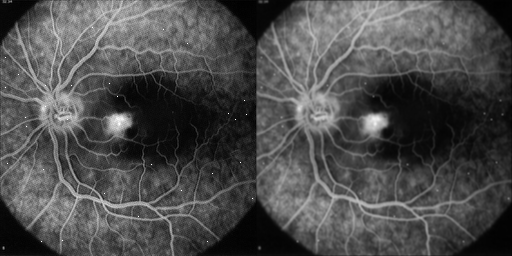

In [31]:
denoised = convolve2d(noised_mtrx, fltr).astype("uint8") # convolve 2d utilizando a funcao scipy.signal.convolve2d
Image.fromarray(glue([noised_mtrx, denoised],2), mode="L")

Podemos observar que grande parte do ruído foi atenuado sendo utilizado uma máscara de ordem 3, o que é de fato eficaz.
Podemos verificar se com um filtro maior obtermos melhor resultado.

In [32]:
fltr_x, fltr_y, fltr = yield_filters(5)

filtro gaussiano em x=
 [1. 4. 6. 4. 1.] *1/16
filtro gaussiano em y=
 [1. 4. 6. 4. 1.] *1/16
filtro gaussiano matricial=
 [[ 1.  4.  6.  4.  1.]
 [ 4. 16. 24. 16.  4.]
 [ 6. 24. 36. 24.  6.]
 [ 4. 16. 24. 16.  4.]
 [ 1.  4.  6.  4.  1.]] *1/256


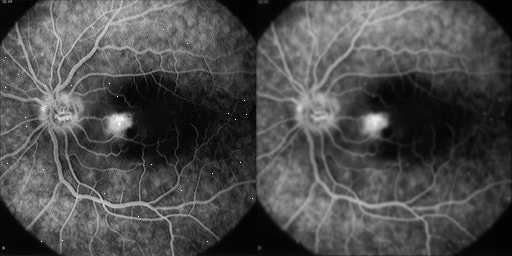

In [33]:
denoised = convolve2d(noised_mtrx, fltr).astype("uint8") # convolve 2d utilizando a funcao scipy.signal.convolve2d
Image.fromarray(glue([noised_mtrx, denoised],2), mode="L")

Vemos agora que quase todo o ruído desapareceu, poŕem, às custas da perda de nitidez da imagem. Assim, é necessário fazer uma balanço sobre o quanto se pode perder da imagem para poder retirar o ruído atrávez do método. 

Aumentemos ainda mais o nosso filtro. Repare que a cada vez que aumentamos o filtro, estamos aumentando também tanto o desvio padrão como a média, já que estamos utilizando o triângulo pascal como fonte.

In [34]:
fltr_x, fltr_y, fltr = yield_filters(7)

filtro gaussiano em x=
 [ 1.  6. 15. 20. 15.  6.  1.] *1/64
filtro gaussiano em y=
 [ 1.  6. 15. 20. 15.  6.  1.] *1/64
filtro gaussiano matricial=
 [[  1.   6.  15.  20.  15.   6.   1.]
 [  6.  36.  90. 120.  90.  36.   6.]
 [ 15.  90. 225. 300. 225.  90.  15.]
 [ 20. 120. 300. 400. 300. 120.  20.]
 [ 15.  90. 225. 300. 225.  90.  15.]
 [  6.  36.  90. 120.  90.  36.   6.]
 [  1.   6.  15.  20.  15.   6.   1.]] *1/4096


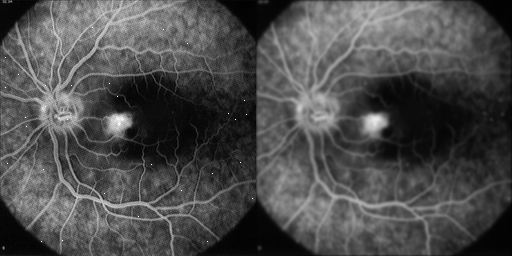

In [35]:
denoised = convolve2d(noised_mtrx, fltr).astype("uint8") # convolve 2d utilizando a funcao scipy.signal.convolve2d
Image.fromarray(glue([noised_mtrx, denoised],2), mode="L")

Assim, como dito acima, podemos inferir de forma rasa que o filtro gaussiano possui boa eficácia em eliminação de ruído, porém, assim como o filtro blur, tem como efeito colateral o borramento da imagem.